In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers = ["T","TSLA", "AXP"]

In [6]:
df= pd.DataFrame()
for t in tickers:
    df[t] = yf.download(t, start="2015-1-1", progress=False)["Adj Close"]

,T,TSLA,AXP
Date,,,
2015-01-02,13.416446,14.620667,81.897911
2015-01-05,13.289686,14.006000,79.732025
2015-01-06,13.309492,14.085333,78.032799
2015-01-07,13.387095,14.063333,79.737030
2015-01-08,13.520280,14.041333,80.867302
...,...,...,...
2023-04-13,19.959999,185.899994,162.300003
2023-04-14,19.930000,185.000000,163.220001
2023-04-17,19.790001,187.039993,163.710007


## Daily Returns

In [10]:
returnsDf = pd.DataFrame()
for t in tickers:
    df[f"{t} daily returns"] = df[t].pct_change()
    returnsDf[f"{t} daily returns"] = df[t].pct_change()

## Saving Returns DF for future use

In [11]:
returnsDf

,T daily returns,TSLA daily returns,AXP daily returns
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.009448,-0.042041,-0.026446
2015-01-06,0.001490,0.005664,-0.021312
2015-01-07,0.005831,-0.001562,0.021840
2015-01-08,0.009949,-0.001564,0.014175
...,...,...,...
2023-04-13,0.009610,0.029689,0.018896
2023-04-14,-0.001503,-0.004841,0.005669
2023-04-17,-0.007025,0.011027,0.003002


## Normal Returns

In [13]:
for t in tickers: 
    df[f"{t} normal return"] = df[t]/df.iloc[0][t]

In [14]:
df

,T,TSLA,AXP,T daily returns,TSLA daily returns,AXP daily returns,T normal return,TSLA normal return,AXP normal return
Date,,,,,,,,,
2015-01-02,13.416446,14.620667,81.897911,NaN,NaN,NaN,1.000000,1.000000,1.000000
2015-01-05,13.289686,14.006000,79.732025,-0.009448,-0.042041,-0.026446,0.990552,0.957959,0.973554
2015-01-06,13.309492,14.085333,78.032799,0.001490,0.005664,-0.021312,0.992028,0.963385,0.952806
2015-01-07,13.387095,14.063333,79.737030,0.005831,-0.001562,0.021840,0.997812,0.961880,0.973615
2015-01-08,13.520280,14.041333,80.867302,0.009949,-0.001564,0.014175,1.007739,0.960376,0.987416
...,...,...,...,...,...,...,...,...,...
2023-04-13,19.959999,185.899994,162.300003,0.009610,0.029689,0.018896,1.487726,12.714877,1.981736
2023-04-14,19.930000,185.000000,163.220001,-0.001503,-0.004841,0.005669,1.485490,12.653321,1.992969
2023-04-17,19.790001,187.039993,163.710007,-0.007025,0.011027,0.003002,1.475055,12.792849,1.998952


## Allocations
- we will use an arbritrary assignment for weights to start

In [15]:
weights = np.array(np.random.random(len(tickers)))

In [18]:
weights = weights/weights.sum()

In [20]:
weights.sum()

1.0000000000000002

In [21]:
weights

array([0.41636506, 0.55252293, 0.03111201])

In [22]:
for ticker, weight in zip(tickers, weights):
    df[f"{ticker} allocation"] = df[f"{t} normal return"] * weight

In [23]:
df

,T,TSLA,AXP,T daily returns,TSLA daily returns,AXP daily returns,T normal return,TSLA normal return,AXP normal return,T allocation,TSLA allocation,AXP allocation
Date,,,,,,,,,,,,
2015-01-02,13.416446,14.620667,81.897911,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.416365,0.552523,0.031112
2015-01-05,13.289686,14.006000,79.732025,-0.009448,-0.042041,-0.026446,0.990552,0.957959,0.973554,0.405354,0.537911,0.030289
2015-01-06,13.309492,14.085333,78.032799,0.001490,0.005664,-0.021312,0.992028,0.963385,0.952806,0.396715,0.526447,0.029644
2015-01-07,13.387095,14.063333,79.737030,0.005831,-0.001562,0.021840,0.997812,0.961880,0.973615,0.405379,0.537945,0.030291
2015-01-08,13.520280,14.041333,80.867302,0.009949,-0.001564,0.014175,1.007739,0.960376,0.987416,0.411125,0.545570,0.030720
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,19.959999,185.899994,162.300003,0.009610,0.029689,0.018896,1.487726,12.714877,1.981736,0.825125,1.094954,0.061656
2023-04-14,19.930000,185.000000,163.220001,-0.001503,-0.004841,0.005669,1.485490,12.653321,1.992969,0.829803,1.101161,0.062005
2023-04-17,19.790001,187.039993,163.710007,-0.007025,0.011027,0.003002,1.475055,12.792849,1.998952,0.832294,1.104467,0.062191


## Position 
-- Assuming a 100k investment

In [28]:
positionDf = pd.DataFrame()
for x in tickers: 
    df[f"{x} position"] = df[f"{x} allocation"] * 100000
    positionDf[f"{x} position"] = df[f"{x} allocation"] * 100000

In [29]:
df

,T,TSLA,AXP,T daily returns,TSLA daily returns,AXP daily returns,T normal return,TSLA normal return,AXP normal return,T allocation,TSLA allocation,AXP allocation,T position,TSLA position,AXP position
Date,,,,,,,,,,,,,,,
2015-01-02,13.416446,14.620667,81.897911,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.416365,0.552523,0.031112,41636.505674,55252.293436,3111.200891
2015-01-05,13.289686,14.006000,79.732025,-0.009448,-0.042041,-0.026446,0.990552,0.957959,0.973554,0.405354,0.537911,0.030289,40535.379645,53791.081994,3028.921549
2015-01-06,13.309492,14.085333,78.032799,0.001490,0.005664,-0.021312,0.992028,0.963385,0.952806,0.396715,0.526447,0.029644,39671.501093,52644.701662,2964.370029
2015-01-07,13.387095,14.063333,79.737030,0.005831,-0.001562,0.021840,0.997812,0.961880,0.973615,0.405379,0.537945,0.030291,40537.924103,53794.458530,3029.111678
2015-01-08,13.520280,14.041333,80.867302,0.009949,-0.001564,0.014175,1.007739,0.960376,0.987416,0.411125,0.545570,0.030720,41112.548929,54556.994650,3072.049318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,19.959999,185.899994,162.300003,0.009610,0.029689,0.018896,1.487726,12.714877,1.981736,0.825125,1.094954,0.061656,82512.544087,109495.434937,6165.577454
2023-04-14,19.930000,185.000000,163.220001,-0.001503,-0.004841,0.005669,1.485490,12.653321,1.992969,0.829803,1.101161,0.062005,82980.266749,110116.110216,6200.527053
2023-04-17,19.790001,187.039993,163.710007,-0.007025,0.011027,0.003002,1.475055,12.792849,1.998952,0.832294,1.104467,0.062191,83229.383194,110446.691630,6219.141759


<AxesSubplot:xlabel='Date'>

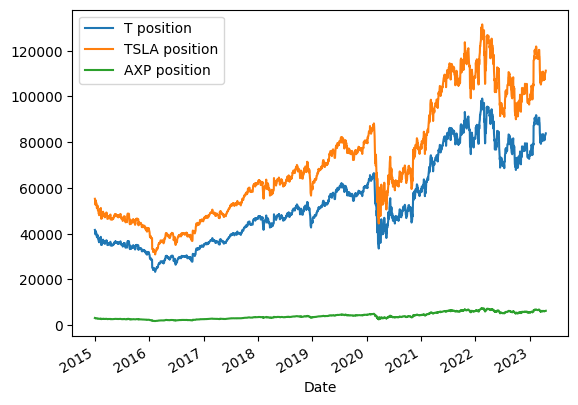

In [31]:
positionDf.plot()

## Total Position

In [32]:
df["total Position"] = positionDf.sum(axis=1)

<AxesSubplot:xlabel='Date'>

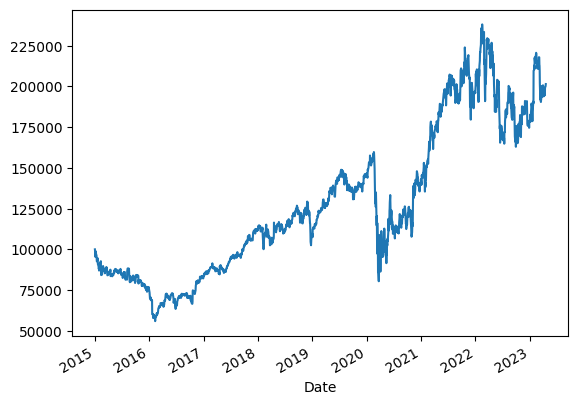

In [35]:
df["total Position"].plot()

## portfolio Daily Return 

In [38]:
df["portfolio Daily Return"] = df["total Position"].pct_change()

<AxesSubplot:ylabel='Frequency'>

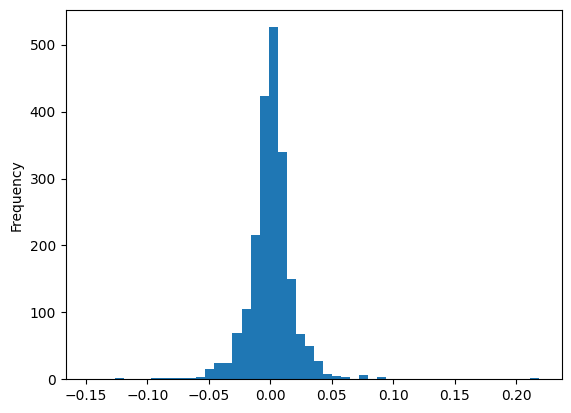

In [42]:
df["portfolio Daily Return"].plot(kind = 'hist', bins = 50)

In [43]:
df

,T,TSLA,AXP,T daily returns,TSLA daily returns,AXP daily returns,T normal return,TSLA normal return,AXP normal return,T allocation,TSLA allocation,AXP allocation,T position,TSLA position,AXP position,total Position,portfolio Daily Return
Date,,,,,,,,,,,,,,,,,
2015-01-02,13.416446,14.620667,81.897911,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.416365,0.552523,0.031112,41636.505674,55252.293436,3111.200891,100000.000000,NaN
2015-01-05,13.289686,14.006000,79.732025,-0.009448,-0.042041,-0.026446,0.990552,0.957959,0.973554,0.405354,0.537911,0.030289,40535.379645,53791.081994,3028.921549,97355.383187,-0.026446
2015-01-06,13.309492,14.085333,78.032799,0.001490,0.005664,-0.021312,0.992028,0.963385,0.952806,0.396715,0.526447,0.029644,39671.501093,52644.701662,2964.370029,95280.572784,-0.021312
2015-01-07,13.387095,14.063333,79.737030,0.005831,-0.001562,0.021840,0.997812,0.961880,0.973615,0.405379,0.537945,0.030291,40537.924103,53794.458530,3029.111678,97361.494311,0.021840
2015-01-08,13.520280,14.041333,80.867302,0.009949,-0.001564,0.014175,1.007739,0.960376,0.987416,0.411125,0.545570,0.030720,41112.548929,54556.994650,3072.049318,98741.592896,0.014175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,19.959999,185.899994,162.300003,0.009610,0.029689,0.018896,1.487726,12.714877,1.981736,0.825125,1.094954,0.061656,82512.544087,109495.434937,6165.577454,198173.556478,0.018896
2023-04-14,19.930000,185.000000,163.220001,-0.001503,-0.004841,0.005669,1.485490,12.653321,1.992969,0.829803,1.101161,0.062005,82980.266749,110116.110216,6200.527053,199296.904017,0.005669
2023-04-17,19.790001,187.039993,163.710007,-0.007025,0.011027,0.003002,1.475055,12.792849,1.998952,0.832294,1.104467,0.062191,83229.383194,110446.691630,6219.141759,199895.216583,0.003002


## Calculatiing portfolio Cumulative Return for time period

In [44]:
100 * (df["total Position"][-1]/df["total Position"][0] - 1)

101.40928479076341

# Makes sense since 
- invested 100K and ended to 201K

In [45]:
df["total Position"][-1]

201409.28479076346

## Calculating Sharp
 - based on the initial assigned weights, what as the greatest return for this portfolio based on the applied volatility

In [47]:
(df["portfolio Daily Return"].mean() / df["portfolio Daily Return"].std()) * np.sqrt(252)

0.4216566742248421

In [50]:
expectedReturn = np.sum((returnsDf.mean() * weights)* 252)

In [51]:
expectedReturn

0.29148132345953354

In [53]:
returnsDf.cov()

,T daily returns,TSLA daily returns,AXP daily returns
T daily returns,0.000198,0.000065,0.000129
TSLA daily returns,0.000065,0.001292,0.000217
AXP daily returns,0.000129,0.000217,0.000412


In [56]:
exnpectedVol = np.sqrt(np.dot(weights.T, np.dot(returnsDf.cov() * 252, weights)))

In [57]:
exnpectedVol

0.3440766779060721

In [58]:
sharp = expectedReturn/ exnpectedVol

In [59]:
sharp

0.8471406002678963

## Monte Carlo Simulation 
- optimization 
- efficient Frontier

In [60]:
np.random.seed(101)
numPortfolios = 5000
allReturns = np.zeros(numPortfolios)
allVols = np.zeros(numPortfolios)
allSharps = np.zeros(numPortfolios)
allWeights = np.zeros((numPortfolios, len(tickers)))

for index in range(numPortfolios):
    weights = np.array(np.random.random(len(tickers)))
    weights = weights/weights.sum()
    
    allWeights[index,:] = weights
    
    allReturns[index] = np.sum( (returnsDf.mean() * weights) * 252 )
    
    allVols[index] = np.sqrt(np.dot(weights.T, np.dot(returnsDf.cov() * 252, weights)))
    
    allSharps[index] = allReturns[index]/ allVols[index]

In [61]:
allSharps.max()

0.8512911755811563

In [63]:
maxSharpIndex = allSharps.argmax()

In [64]:
maxSharpIndex

2783

In [65]:
allWeights[maxSharpIndex]

array([0.31016001, 0.54668074, 0.14315924])

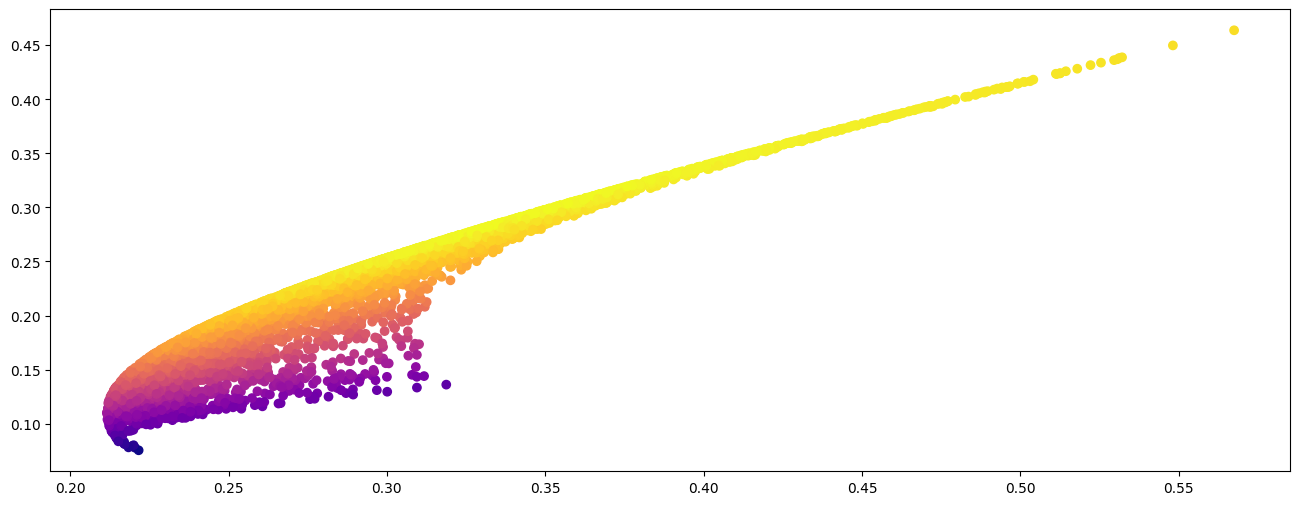

In [67]:
plt.figure(figsize=(16,6))
plt.scatter(allVols, allReturns, c = allSharps, cmap = "plasma")